# Fully Connected NN for spiral branches classification

**Outline**
- Training on GPU if available
- Building a model with Sequential
- Loss functions
- Optimizers

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import torch
from torch import nn, optim
from IPython import display
from utils.visual import set_default, plot_data, plot_model
set_default()

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device: {}'.format(device))

Device: cuda:0


In [3]:
torch.manual_seed(41)
N = 1000  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
H = 100  # num_hidden_units

In [4]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    # When c = 0 and t = 0: start of linspace
    # When c = 0 and t = 1: end of linpace
    # This inner_var is for the formula inside sin() and cos() like sin(inner_var) and cos(inner_Var)
    inner_var = torch.linspace(
        # When t = 0
        (2 * np.pi / C) * (c),
        # When t = 1
        (2 * np.pi / C) * (2 + c),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor((
            np.sin(inner_var[index]), np.cos(inner_var[index])
        ))
        y[ix] = c
        index += 1

print("Shapes:")
print("X:", X.size())
print("y:", y.size())

Shapes:
X: torch.Size([3000, 2])
y: torch.Size([3000])


In [5]:
y

tensor([0, 0, 0,  ..., 2, 2, 2], device='cuda:0')

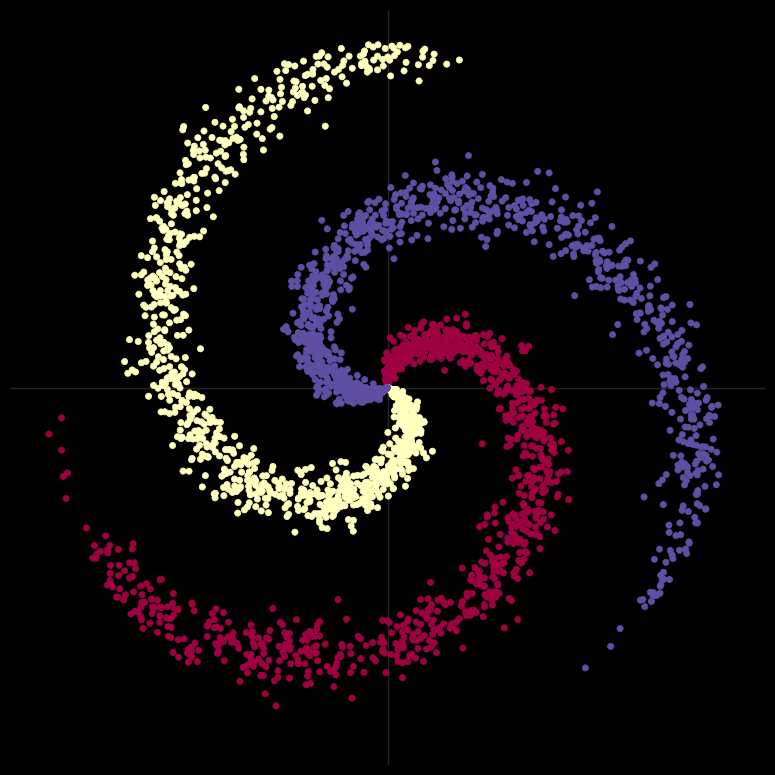

In [6]:
# visualise the data
plot_data(X, y)

In [7]:
# %%timeit

lr = 1e-3
lambdaL2 = 1e-5
epochs = 1000

model = nn.Sequential(
            nn.Linear(D, H),
            nn.ReLU(),
            nn.Linear(H, C))
model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=lambdaL2)

for e in range(epochs):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    print("[EPOCH]: {}, [LOSS]: {}".format(e, loss.item()))
    display.clear_output(wait=True)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[EPOCH]: 999, [LOSS]: 0.20482590794563293


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


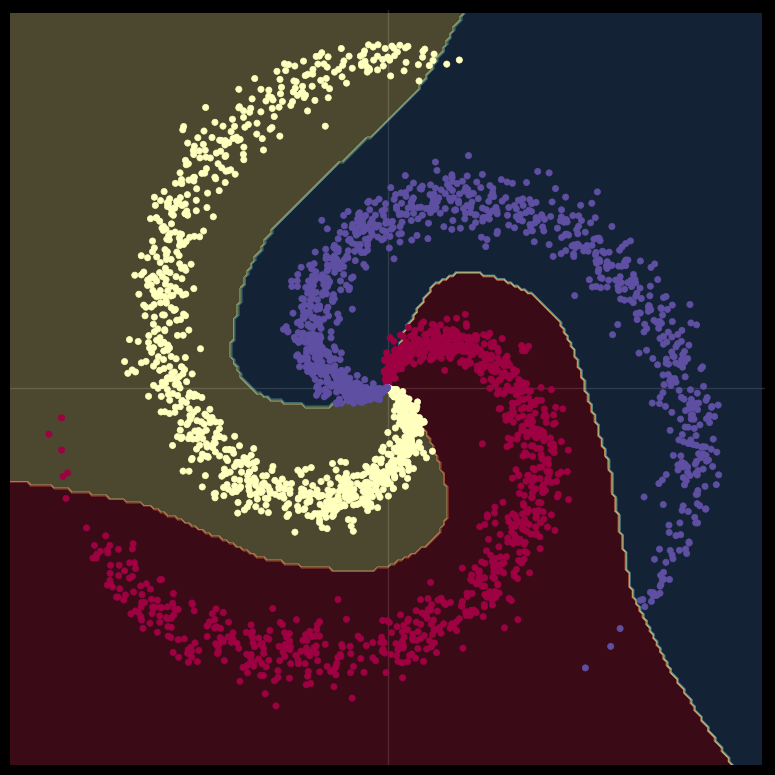

In [8]:
# Plot trained model
set_default()
print(model)
plot_model(X, y, model)

### Resources
[Very nice notebooks by Alfredo Canziani](https://github.com/Atcold/pytorch-Deep-Learning)
